In [177]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt
from random import SystemRandom, randint
from miller_rabin import is_prime
from time import process_time   

## Core 2: Decompose Function

In [178]:
def decompose(n):
    """Generates a dictionary representing the prime decomposition."""
    factors={}
    current_number=n                            #divide current_number by the factors found until it reaches 1
    while current_number > 1:
        p=smallest_factor(current_number)
        if p in factors.keys():                 #if p is not a new factor, increase the power
            factors[p]+=1
        else:
            factors[p]=1                        #if p is a new factor, create a new entry
        current_number = current_number//p
    return factors

def smallest_factor(n):
    """Returns the smallest factor of a positive integer n."""
    sqrt=n**0.5
    i=2
    while i<=sqrt:
        if n%i==0:
            return i                            #If we get here, return i as the value.
        i+=1
    return n   



def random_prime(n_bit, t, trails = 500):
    '''Returns a uniform n-bit prime, with probability at most 2^(-t) getting a composite,
    the higher the trails the less chance of failing to generate a prime but takes longer'''
    for i in range(0, trails):
        p = np.random.randint(0,2,n_bit-2)
        b = "".join(str(i) for i in p)
        my_int = int("1" + b + "1", 2) #Want at least n bit and gives odd        
        if is_prime_miller_rabin(my_int, t):
            return my_int
    return "Fail"

def is_prime_miller_rabin(N,t = 40):
    '''If N is prime, test always outputs True(prime)
    If N is composite outputs False(not prime) except with probability at most 2^(-t)'''
    
    if N == 2:
        return True # Prime
    
    if N == 3:
        return True # Prime
    
    if N % 2 == 0:
        return False # Comp
    
    if N < 2:
        return False # Comp
    
    d, s = calc_d_s(N)
    for j in range(0,t):
        a = ran.randrange(2,N-1)
        if is_composite(N, d, s, a):
            return False #Comp
    return True #Prime

def calc_d_s(N):
    s = 0
    Num = N - 1
    while Num%2 == 0:
        Num //= 2
        s += 1
    d = Num
    return int(d), int(s)

def is_composite(N, d, s, a):
    '''Evaulate a^d != +-1 mod(N), and, a^(d*2^r) != -1 mod(N) for r in {1,2,...,s-1},
    However, if output False does not mean prime, it could be a strong liar'''
    remain = pow(a, d, N)
    if (remain != 1) and (remain != N - 1):
        for r in range(1,s):
            remain = pow(remain, 2, N)
            if remain != N-1:
                pass
            else:
                return False    
    else:
        return False
    
    return True

In [179]:
def generate_N(k,n,verbose = False):
    '''
    Takes k and n as inputs where k is how many bits the random primes, p and q are. The input n is how many N = p*q 
    we generate. This function returns an n-sized list of N's (p*q's).
    We have verbose as an input for our tests below to check that indeed N = p*q.
    '''
    
    alist = ([])
    for i in range(2*n):
        alist.append(random_prime(k, 40))
    x = np.array_split(alist,n)
    blist = ([])
    for j in range(n):
        blist.append(np.product(x[j]))
    if verbose == True:
        return blist,x
    else:
        return blist
     
    

def generate_sampleN(a,b,c,verbose = False):
    '''
    Takes a,b,c as inputs where a is the smallest a bit p and q random primes we generate to produce N=p*q and b is 
    the largest b bit pand q random primes we generate to produce N=p*q. The input c tells the function how many N's
    to produce for each bit size. 
    This function returns a b - a + 1 dimensional array of N's for each bit size between a and b.
    '''
    if b >= a:
        bignumbers = []
        for p in range(a,b+1):
            bignumbers.append(generate_N(p,c))
        return np.array(bignumbers)
    else:
        return 'Error: Second input must be greater than the first input.'
        
generate_sampleN(3,5,11)

array([[ 35,  49,  25,  49,  25,  49,  35,  35,  49,  35,  35],
       [143, 169, 169, 143, 169, 169, 143, 143, 121, 121, 143],
       [899, 527, 841, 437, 667, 289, 713, 713, 437, 667, 437]])

In [180]:
#Tests
assert len(generate_N(5,1)) == 1             #Checking the final input gives the number of N's generated
assert len(generate_N(31,5)) == 5

a = (generate_N(5,1,True))                   #Checking N = p*q
assert np.product(a[1]) == a[0]
b = (generate_N(7,5,True))
for i in range(5):
    assert np.product(b[1][i]) == b[0][i]
    
assert len(generate_sampleN(2,5,6)) == 5-2+1     #Checking this function generates a b-a+1 dimensional array of N's for each bit size between a and b
assert len(generate_sampleN(3,9,11)[5]) == 11    #Checking each sample of N's generated for each bit size betwen a and b has length c
for j in range(8-4+1):
    assert len(generate_sampleN(4,8,13)[j]) == 13  
    
assert generate_sampleN(3,2,5) == 'Error: Second input must be greater than the first input.' #Checking error message



In [181]:
'''
I have chosen to generate a sample of N's where p and q are between 10 and 27 bit random primes because otherwise if
they were longer, it would take a very long time for the average decompose time to run. I have also chosen a sample 
size of 4 for each N so I am able to find an average from a decently sized sample as well as so the average decompose 
time doesn't take too long to run.
'''

a = 10
b = 27
c = 4
samples = generate_sampleN(a,b,c)
sample_size = len(samples[1])


start = []
end = []
total_time = []
average_time = []
for i in range(b-a+1):
    start.append(process_time())           
    for n in samples[i]:
        decompose(n)
    end.append(process_time())  

for j in range(b-a+1):
    total_time.append(end[j] - start[j])
for k in range(b-a+1):
    average_time.append(total_time[k] / sample_size)

print("bit_size of p and q   Average decompose(N) time")
print("===================   =========================")
for n in range(b-a+1):
    average_time1 = str(average_time[n])
    y = n+a
    print("{:7s}               {:20s}".format(str(y),average_time1))

bit_size of p and q   Average decompose(N) time
===================   =========================
10                    0.0015140000000002374
11                    0.0024084999999995915
12                    0.006017499999999565
13                    0.011141499999999915
14                    0.021158999999999928
15                    0.04024349999999988 
16                    0.07781899999999986 
17                    0.13671199999999928 
18                    0.2943815000000001  
19                    0.5659890000000001  
20                    1.1506845000000006  
21                    2.5225515000000005  
22                    4.9335415000000005  
23                    10.068831999999997  
24                    22.046824499999996  
25                    40.763031999999995  
26                    92.8594935          
27                    183.625892          


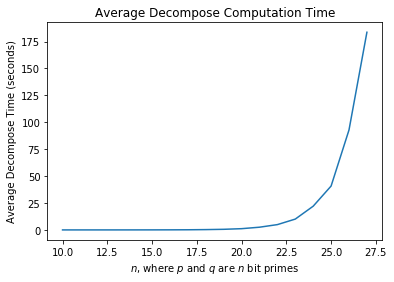

In [182]:
x = range(a,b+1)
plt.plot(x, average_time)
plt.xlabel('$n$, where $p$ and $q$ are $n$ bit primes')
plt.ylabel('Average Decompose Time (seconds)')
plt.title('Average Decompose Computation Time')
plt.show()

In [ ]:
dlist = []
for i in range(b-a-1):
    ratio = average_time[i+1]/average_time[i]
    dlist.append(ratio)
ratio_mean = np.mean(dlist)
ratio_std = np.std(dlist)

print('Ratio Mean = {}'.format(ratio_mean))
print('Ratio Standard Deviation = {}'.format(ratio_std))

### Estimating the Average Decompose Time

Since the standard deviation for the ratio between the average decompose running time for $N$=$pq$ where $p$ and $q$ are $n$ bit random prime and for when $p$ and $q$ are $n-1$ bit random primes is quite small, it shows that this ratio roughly stays constant.
Therefore, we can assume that for one bit we add onto each $p$ and $q$, the average decompose running time for $N=pq$ approximately doubles. In essence, the ratio increases logarithmically, as the graph above would suggest.

In terms of the Big O notation, the decompose function is $O(2^n)$, since it has the shape of the graph $y = 2^x$. 
In order to estimate the average decompose time for larger values of $N$, we will plot a graph of shape $y = 2^x$, but where at $x = 10$, $y$ is the average decompose time for this number of bits.


In [38]:
p = np.arange(10,50,0.01)
c = average_time[0]
flist = []
for n in np.arange(0,40,0.01):
    flist.append(c*(2**n))
    

print("bit_size of p and q   Estimated Average decompose(N) time")
print("===================   ===================================")
for n in range(40):
    average_time2 = str(flist[100*n])
    y = n+a
    print("{:7s}               {:20s}".format(str(y),average_time2))

bit_size of p and q   Estimated Average decompose(N) time
===================   ===================================
10                    0.0012190000000000811
11                    0.0024380000000001623
12                    0.0048760000000003245
13                    0.009752000000000649
14                    0.019504000000001298
15                    0.039008000000002596
16                    0.07801600000000519 
17                    0.15603200000001038 
18                    0.31206400000002077 
19                    0.6241280000000415  
20                    1.248256000000083   
21                    2.496512000000166   
22                    4.993024000000332   
23                    9.986048000000665   
24                    19.97209600000133   
25                    39.94419200000266   
26                    79.88838400000532   
27                    159.77676800001063  
28                    319.55353600002127  
29                    639.1070720000425   
30                   

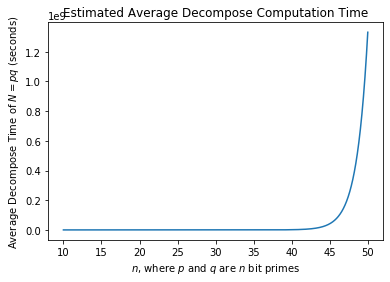

In [184]:
plt.plot(p,flist)
plt.xlabel('$n$, where $p$ and $q$ are $n$ bit primes')
plt.ylabel('Average Decompose Time of $N = pq$ (seconds)')
plt.title('Estimated Average Decompose Computation Time')
plt.show()